# Employee Turnover Model

## Exploratory Data Analysis (EDA)

### Dataset Description

In this notebook, I will be exploring the components and characteristics of the IBM HR Analytics Employee Attrition & Performance from Kaggle (originally sourced from IBM). In this dataset, there is demographic, compensation, and work/career data on 1,470 employees in a hypothetical company. For the purpose of this exercise which will be written as a report, we will call this company Magdalene Corporation.

### What are we looking for?
 
We are looking to understand the size of the dataset, the feature space, and the patterns in employee groups that could help us understand the common profile of people that may have a higher tendency to leave. We must understand this context in order to make the correct assumptions once modeling begins. This can be achieve through basic examinations through visualization and fundamental aggregations.

In [29]:
# Importing packages
import pandas as pd
import numpy as np
import os
from openpyxl import load_workbook
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import string

In [13]:
# Set working dir and import our data
PATH = "C:\\1columbia\\funprojects\\employee-turnover\\"
os.chdir(PATH)

ibm_df = pd.read_excel('data\WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [14]:
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
print(ibm_df.shape)
print(ibm_df.dtypes.value_counts())

(1470, 35)
int64     26
object     9
dtype: int64


In [17]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [42]:
# There 0 nulls, but what about empty strings?
object_df = ibm_df.select_dtypes(['object'])
np.where(object_df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

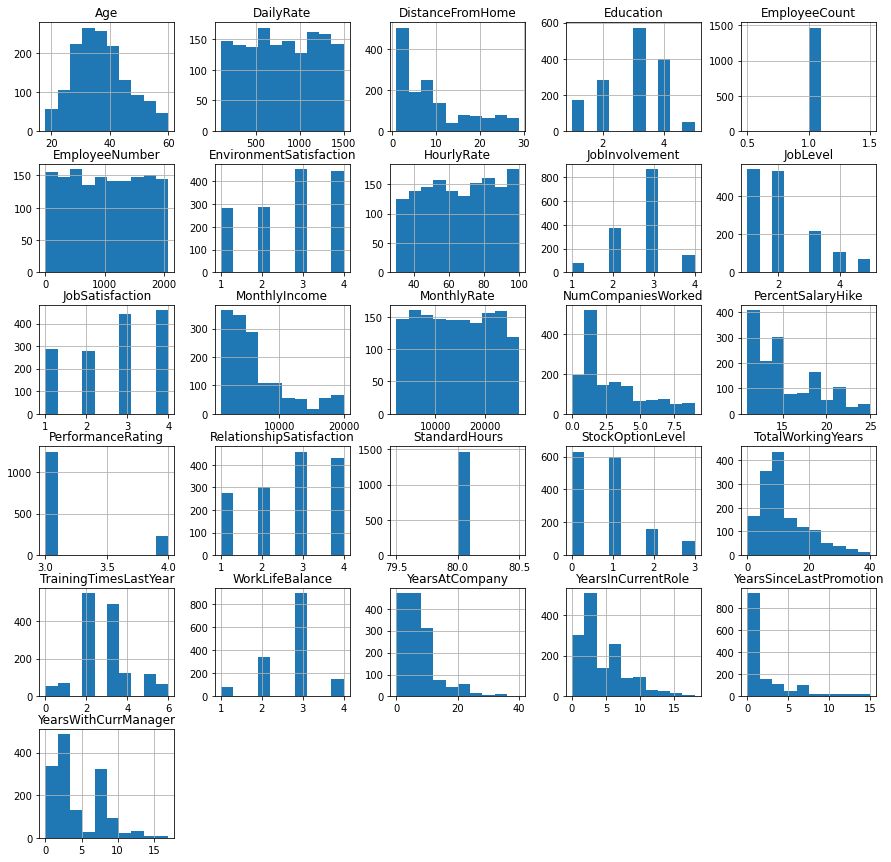

In [21]:
ibm_df.hist(figsize=(15,15))
plt.show()

#### Data Structure

The dataset has a shape of (1470, 35): which means there are 35 variables and 1,470 rows. Of the columns, there are 26 numeric variables and 9 non-numeric variable. There are also no numerical nulls or empty strings.

#### Variable Distribution (Numeric)

There are two constant values:
1. Employee Count
2. Standard Hours 

These variables are left-skewed:
1. Education
2. Environment Satisfaction
3. Job Involvement
4. Job Satisfaction
5. Relationship Satisfaction
6. Work Life Balance

These variables are right-skewed
1. Age
2. Distance from Home
3. Job Level
4. Monthly Income
5. Number of Companies Worked
6. Percent Salary Hike
7. Stock Option Level
8. Total Working Hours
9. Years at Company
10. Years in Current Role
11. Years Since Last Promotion
12. Years with Current Manager (Bimodal)